In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

In [2]:
from google.colab import drive #to import google drive data

In [3]:
drive.mount('/content/drive') #to mount the drive data into colab clound and enter the activation code

Mounted at /content/drive


In [4]:
cd /content/drive/"My Drive/Colab Notebooks/Kmeans"

/content/drive/My Drive/Colab Notebooks/Kmeans


In [5]:
df1=pd.read_excel("kmean.xlsx",sheet_name='ex7data2_X',header=None)

In [6]:
df1.head()

,0,1
0,1.842080,4.607572
1,5.658583,4.799964
2,6.352579,3.290854
3,2.904017,4.612204
4,3.231979,4.939894


In [7]:
type(df1)

pandas.core.frame.DataFrame

In [8]:
X=np.array(df1)

In [9]:
import random

In [11]:
init_centroids=random.sample(range(0,len(df1)),3)

In [12]:
init_centroids

[187, 160, 180]

In [13]:
centroids=[]
for i in init_centroids:
  centroids.append(df1.iloc[i])

In [14]:
centroids

[0    4.304711
 1    1.107260
 Name: 187, dtype: float64, 0    3.936160
 1    1.462029
 Name: 160, dtype: float64, 0    3.124051
 1    0.678218
 Name: 180, dtype: float64]

In [15]:
centroids=np.array(centroids)

In [16]:
centroids

array([[4.30471138, 1.10725995],
       [3.93616029, 1.46202934],
       [3.12405123, 0.67821757]])

In [21]:
def calc_distance(x1,x2):
  return(sum((x1-x2)**2))**0.5

In [24]:
def findclosestcentroid(c,X):
  assign_centroid=[]
  for i in X:
    distance=[]
    for j in c:
      distance.append(calc_distance(i,j))
    assign_centroid.append(np.argmin(distance))
  return assign_centroid

In [26]:
get_centroid=findclosestcentroid(centroids,X)

In [33]:
def calc_centroids(cluster,X):
  new_centroid=[]
  new_df1=pd.concat([pd.DataFrame(X),pd.DataFrame(cluster,columns=['cluster'])],axis=1)
  for c in set(new_df1['cluster']):  #unique values of clusters: 0,1,2
    current_cluster=new_df1[new_df1['cluster']==c][new_df1.columns[:-1]]  #Considering all X and Y values for Particular cluster c
    current_mean=current_cluster.mean(axis=0)
    new_centroid.append(current_mean)
  return new_centroid

In [ ]:
for i in range(10):
  get_centroid=findclosestcentroid(centroids,X) #obtained the cluster number for each observation
  centroids=calc_centroids(get_centroid,X)
  
  #Visualize
  plt.figure()
  
  plt.scatter(X[:,0],X[:,1],alpha=1)
  plt.scatter(np.array(centroids)[:,0],np.array(centroids)[:,1],color='black') #centroid point
  plt.show()

In [36]:
import cv2
im=cv2.imread('Tom.jpg')

In [39]:
im.shape

(200, 200, 3)

In [40]:
im=(im/255).reshape(200*200,3)

In [42]:
init_centroids=random.sample(range(0,len(im)),10)
init_centroids

[20543, 5790, 9769, 26545, 14089, 23261, 484, 10070, 21990, 4417]

In [43]:
centroids=[]
for i in init_centroids:
  centroids.append(im[i])

In [44]:
centroids=np.array(centroids)

In [45]:
centroids

array([[0.16862745, 0.88235294, 0.85098039],
       [0.60392157, 0.55294118, 0.46666667],
       [0.58431373, 0.58823529, 0.48627451],
       [0.05882353, 0.83921569, 0.80784314],
       [0.2627451 , 0.29411765, 0.36078431],
       [0.0627451 , 0.31372549, 0.29411765],
       [0.32941176, 0.63529412, 0.56862745],
       [0.25882353, 0.29019608, 0.43529412],
       [0.11764706, 0.74509804, 0.72156863],
       [0.03137255, 0.08235294, 0.77254902]])

In [47]:
for i in range(15):
  print(i)
  get_centroid=findclosestcentroid(centroids,im) #obtained the cluster number for each observation
  centroids=calc_centroids(get_centroid,im)

0
1
2
3
4
5
6
7
8
9
10
11
12
13
14


In [48]:
im_recovered = im.copy()
for i in range(len(im)):
    im_recovered[i] = centroids[get_centroid[i]]

In [49]:
im_recovered = im_recovered.reshape(200,200, 3)

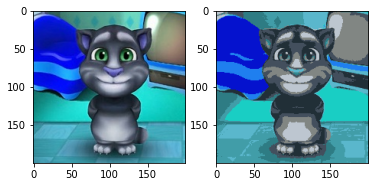

In [50]:
im1 = cv2.imread('Tom.jpg')
import matplotlib.image as mpimg
fig,ax = plt.subplots(1,2)
ax[0].imshow(im1)
ax[1].imshow(im_recovered)